In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import time

In [2]:
import sys
sys.path.append("../code")
import model_agegroups
import plotting
import plotting_agegroups
import parameters_agegroups

In [3]:
C_household = np.loadtxt('../parameters/Germany_country_level_F_household_setting_85.csv', delimiter=',')
C_school = np.loadtxt('../parameters/Germany_country_level_F_school_setting_85.csv', delimiter=',')
C_workplace = np.loadtxt('../parameters/Germany_country_level_F_work_setting_85.csv', delimiter=',')
C_community = np.loadtxt('../parameters/Germany_country_level_F_community_setting_85.csv', delimiter=',')

w_h = 4.1100
w_s = 11.4100
w_w = 8.0700
w_c = 2.7900

ind = [0, 19, 39, 59, 69, 79, -1];

C_H = np.zeros([6,6])
C_S = np.zeros([6,6])
C_W = np.zeros([6,6])
C_C = np.zeros([6,6])

for i in range(6):
    for j in range(6):
        C_H[i,j] = C_household[ind[i]:ind[i+1],ind[j]:ind[j+1]].sum()
        C_S[i,j] = C_school[ind[i]:ind[i+1],ind[j]:ind[j+1]].sum()
        C_W[i,j] = C_workplace[ind[i]:ind[i+1],ind[j]:ind[j+1]].sum()
        C_C[i,j] = C_community[ind[i]:ind[i+1],ind[j]:ind[j+1]].sum()

C = w_h*C_H + w_s*C_S + w_w*C_W + w_c*C_C
rho = max(np.linalg.eigvals(C))

C_H = w_h * C_H / rho
C_S = w_s * C_S / rho
C_W = w_w * C_W / rho
C_C = w_c * C_C / rho

Cs = np.array([C_H, C_S, C_W, C_C])

In [4]:
params_m1 = parameters_agegroups.get_params(country='Germany', modeltype='ramp')
params_m2 = parameters_agegroups.get_params(country='Germany', modeltype='ramp')
params_m3 = parameters_agegroups.get_params(country='Germany', modeltype='ramp')
params_m4 = parameters_agegroups.get_params(country='Germany', modeltype='ramp')
params_m5 = parameters_agegroups.get_params(country='Germany', modeltype='ramp')

In [5]:
for p in [params_m1,params_m2,params_m3,params_m4,params_m5]:
    p['Cs'] = Cs
    p['fit_LR_free'] = np.array([1.0, 1.0, 1.0, 1.0])
    p['fit_HR_free'] = np.array([0.8, 0.8, 0.6, 0.6])
params_m1.update({'fit_LR_reduced':np.array([1.0, 1.0, 1.0, 1.0]),
                  'fit_HR_reduced':np.array([0.8, 0.8, 0.6, 0.6])})
params_m2.update({'fit_LR_reduced':np.array([1.0, 0.5, 0.9, 0.9]),
                  'fit_HR_reduced':np.array([0.8, 0.25, 0.5, 0.5])})
params_m3.update({'fit_LR_reduced':np.array([1.0, 0.5, 0.5, 0.9]),
                  'fit_HR_reduced':np.array([0.8, 0.25, 0.25, 0.5])})
params_m4.update({'fit_LR_reduced':np.array([1.0, 0.5, 0.5, 0.5]),
                  'fit_HR_reduced':np.array([0.8, 0.25, 0.25, 0.25])})
params_m5.update({'fit_LR_reduced':np.array([1.0, 0.25, 0.5, 0.2]),
                  'fit_HR_reduced':np.array([0.8, 0.1, 0.25, 0.1])})

In [6]:
m1 = model_agegroups.Model(**params_m1)
m2 = model_agegroups.Model(**params_m2)
m3 = model_agegroups.Model(**params_m3)
m4 = model_agegroups.Model(**params_m4)
m5 = model_agegroups.Model(**params_m5)

In [7]:
start_time = time.time()
times, data = m1.run()
print(time.time() - start_time)
times, data = m2.run()
print(time.time() - start_time)
times, data = m3.run()
print(time.time() - start_time)
times, data = m4.run()
print(time.time() - start_time)
times, data = m5.run()
print(time.time() - start_time)

112.57895755767822
225.00861883163452
337.5816674232483
450.2370810508728
562.214234828949


In [8]:
[(m.chopped_data() < 0 ).any() for m in [m1,m2,m3,m4,m5]]

[False, False, False, False, False]

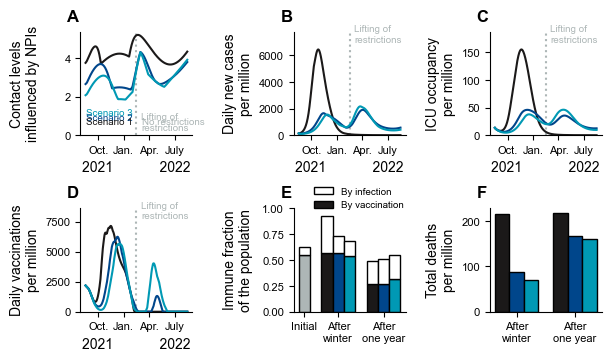

In [9]:
import importlib
importlib.reload(plotting_agegroups)
plotting_agegroups.sixpanels([m1,m2,m3], "./figures/show.pdf", arial=True)

In [10]:
importlib.reload(plotting_agegroups)
plotting_agegroups.overview_agegroups(m1, path='./figures/AG_scen1.pdf', arial=True, silent=True)
plotting_agegroups.overview_agegroups(m2, path='./figures/AG_scen2.pdf', arial=True, silent=True)
plotting_agegroups.overview_agegroups(m3, path='./figures/AG_scen3.pdf', arial=True, silent=True)
plotting_agegroups.overview_agegroups(m4, path='./figures/AG_scen4.pdf', arial=True, silent=True)
plotting_agegroups.overview_agegroups(m5, path='./figures/AG_scen5.pdf', arial=True, silent=True)

In [11]:
m1.new_sr(99)

array([0.53333333, 0.8       , 0.6       , 0.6       ])

In [12]:
C_base = np.loadtxt('../parameters/C_Base.csv', delimiter=',')
C_vol = np.loadtxt('../parameters/C_vol.csv', delimiter=',')
C_npi_general = np.loadtxt('../parameters/C_NPI_general.csv', delimiter=',')
C_npi_school = np.loadtxt('../parameters/C_NPI_School.csv', delimiter=',')
C_npi_work = np.loadtxt('../parameters/C_NPI_work.csv', delimiter=',')

In [13]:
C_school = np.loadtxt('../parameters/Germany_country_level_F_school_setting_85.csv', delimiter=',')

In [14]:
C_school

array([[0.00150573, 0.00146443, 0.00150926, ..., 0.        , 0.        ,
        0.        ],
       [0.00148946, 0.001464  , 0.00150906, ..., 0.        , 0.        ,
        0.        ],
       [0.00150285, 0.0014774 , 0.00149612, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [15]:
def new_sr(t):
    a = -(m1.fit_HR-m1.fit_LR)/m1.fit_ICUcap
    b = m1.fit_HR-m1.fit_LR
    return (m1.H_Rt(t)[0]<m1.fit_ICUcap) * (a*m1.H_Rt(t)[0]+b) + m1.fit_LR

In [16]:
a = -(m1.fit_HR-m1.fit_LR)/m1.fit_ICUcap
b = m1.fit_HR-m1.fit_LR
(m1.H_Rt(0)<m1.fit_ICUcap) * (a*m1.H_Rt(t)+b) + m1.fit_LR

TypeError: unsupported operand type(s) for -: 'method' and 'method'

In [ ]:
x = np.linspace(0,360,1000)
plt.plot(x,5*m1.Gamma(x))
plt.show()

In [ ]:
def new_sr(t):
    a = -(m1.fit_LR-m1.fit_HR)/m1.fit_ICUcap
    b = m1.fit_LR-m1.fit_HR
    # ugly hack: just choose the first entry of H_Rt, FIX IT LATER!
    res =  (t<m1.fit_ICUcap) * (a*t+b) + m1.fit_HR
    # scale down households
    res[0] *= res[1:].sum()/3.
    return res

In [ ]:
x = np.linspace(0,100,1000)
plt.plot(x, list(map(new_sr, x)))
plt.show()

In [ ]:
m1.fit_ICUcap